# Housing Prediction London


In [1]:
# install things we don't have
!pip install sklearn

In [154]:
# import dependencies
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plotty
import missingno as msno
%matplotlib inline

In [ ]:
# delete a specific column
del df['column_name']

In [ ]:
# Encode binary values
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [9]:
pricing_data.deed_date.describe()

count         345551
unique          1592
top       31/03/2016
freq            3086
Name: deed_date, dtype: object

In [ ]:
pricing_data.deed_date.order

In [17]:
pricing_data.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url
0,8355F008-E750-55C5-E053-6B04A8C0D090,233500,2018-11-26,E1 0AD,F,N,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
1,6ADB7B46-76D2-4FB8-BA12-DEEECB58CEB2,270000,2014-08-07,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,2018-06-12,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,2017-03-31,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,2017-05-23,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [19]:
pricing_data.sort_values(by=['deed_date'])

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url
252181,251D6F40-F7C9-49A6-AF9E-40F2D682137F,250000,2014-01-06,SW16 4AQ,S,N,F,NaN,1455A,LONDON ROAD,NaN,LONDON,CROYDON,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
40317,92B21AD5-39BD-47F2-8906-C6186770481A,235000,2014-01-06,E18 1FF,F,Y,L,FLAT 11,"SCENIX HOUSE, 86",CHIGWELL ROAD,NaN,LONDON,REDBRIDGE,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
214191,5CE703F4-457C-4902-B1B9-25F065A8F8CC,205000,2014-01-07,SE4 1UY,F,N,L,FLAT 16,"LEIGH COURT, 213",LEWISHAM WAY,NaN,LONDON,LEWISHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
340283,F2BF0719-32B0-4531-B98D-31D7ABED0456,490000,2014-01-07,W9 3BL,F,N,L,FIRST FLOOR FLAT,249,PORTNALL ROAD,NaN,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
112115,5E590993-DE0B-4A23-9637-76C0AB2C5D99,1270000,2014-01-07,N7 6JG,T,N,F,NaN,26,WINDSOR ROAD,NaN,LONDON,ISLINGTON,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
320324,204B09F3-F340-40D4-AA47-BA03F13E006F,873000,2014-01-07,W2 4ET,F,N,L,FLAT 6,"THE LIMES, 34 - 36",LINDEN GARDENS,NaN,LONDON,KENSINGTON AND CHELSEA,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
193730,5380E51B-BD0B-47A9-8E18-BEFE5883BA95,250000,2014-01-07,SE20 8EN,F,N,L,FLAT 5,DOVER HOUSE,ANERLEY ROAD,NaN,LONDON,BROMLEY,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
99273,3C50FC8C-53E4-468C-96FA-658F9AA5DFEC,290000,2014-01-07,N20 9HA,F,N,L,FLAT 5,HIGHLANDS,OAKLEIGH ROAD NORTH,NaN,LONDON,BARNET,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
196236,54A670F5-FF60-4FBD-8BAF-054D55B61B28,270000,2014-01-07,SE22 8BZ,F,N,L,FLAT 47A,FELBRIDGE HOUSE,DOG KENNEL HILL ESTATE,NaN,LONDON,SOUTHWARK,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...
295561,C992C044-8310-4261-A6B9-FC860945B425,1455000,2014-01-07,SW6 7JP,T,N,F,NaN,67,REPORTON ROAD,NaN,LONDON,HAMMERSMITH AND FULHAM,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...


In [20]:
pricing_data.deed_date.min()

Timestamp('2014-01-06 00:00:00')

In [63]:
pricing_data.dtypes

price_paid                       int64
deed_date               datetime64[ns]
property_type                   object
new_build                       object
estate_type                     object
district                        object
transaction_category            object
dtype: object

In [66]:
pricing_data.property_type.unique()

array(['F', 'T', 'O', 'S', 'D'], dtype=object)

In [67]:
pricing_data.new_build.unique()

array(['N', 'Y'], dtype=object)

In [68]:
pricing_data.estate_type.unique()


array(['L', 'F'], dtype=object)

In [69]:
pricing_data.district.unique()

array(['TOWER HAMLETS', 'CITY OF LONDON', 'HACKNEY', 'HARROW',
       'WALTHAM FOREST', 'REDBRIDGE', 'HARINGEY', 'NEWHAM',
       'BARKING AND DAGENHAM', 'LEWISHAM', 'LAMBETH', 'SOUTHWARK',
       'WANDSWORTH', 'GREENWICH', 'BRENT', 'EALING', 'HOUNSLOW',
       'ENFIELD', 'HILLINGDON', 'EPPING FOREST', 'ISLINGTON', 'CAMDEN',
       'CITY OF WESTMINSTER', 'BARNET', 'HAMMERSMITH AND FULHAM',
       'HARLOW', 'CROYDON', 'BROMLEY', 'BEXLEY', 'SUTTON',
       'KINGSTON UPON THAMES', 'KENSINGTON AND CHELSEA',
       'RICHMOND UPON THAMES', 'MERTON'], dtype=object)

In [71]:
pricing_data.transaction_category.unique()

array(['A', 'B'], dtype=object)

In [136]:
df = df[['price_paid', 'deed_date','property_type','new_build', 'estate_type', 'district','transaction_category']]

# Description of Data

# Correlation matrix of each column pair

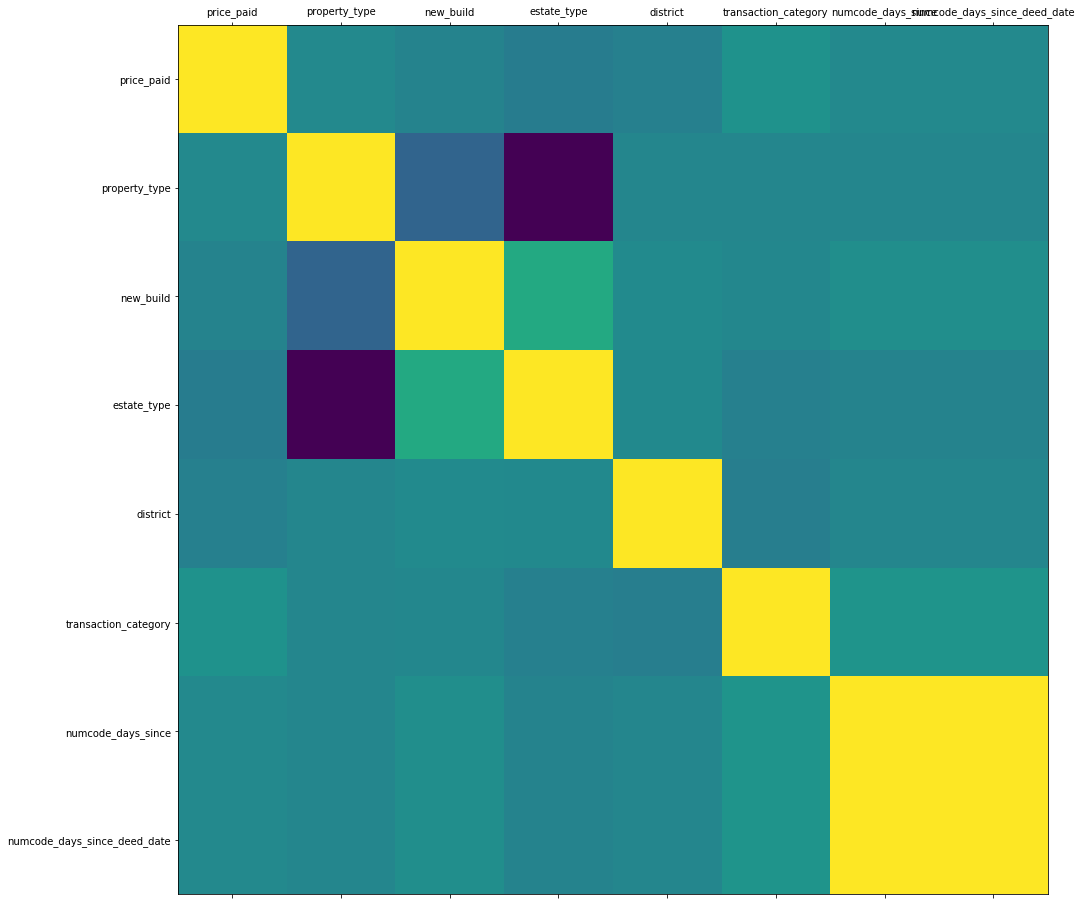

In [218]:
def plot_corr(df, size=16):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                               0 ------------------>  1
                                               Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr()    ## data frame correlation function
    fig, ax = plotty.subplots(figsize=(size, size))
    ax.matshow(corr)    # color code the rectangles by correlation value
    plotty.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plotty.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

plot_corr(df)

# Drop variables we're not interested in

In [243]:
df.drop(['unique_id', 'paon', 'saon', 'linked_data_url', 'street', 'locality', 'county', 'town','postcode'], axis=1)

,price_paid,deed_date,property_type,new_build,estate_type,district,transaction_category
0,233500,26/11/2018,F,N,L,TOWER HAMLETS,A
1,270000,08/07/2014,F,N,L,TOWER HAMLETS,A
2,176000,06/12/2018,F,N,L,TOWER HAMLETS,A
3,450000,31/03/2017,F,N,L,TOWER HAMLETS,B
4,440000,23/05/2017,F,N,L,TOWER HAMLETS,A
5,430500,18/10/2018,F,N,L,TOWER HAMLETS,A
6,390000,19/12/2018,F,N,L,TOWER HAMLETS,A
7,490000,04/09/2017,F,N,L,TOWER HAMLETS,A
8,455000,23/10/2015,F,N,L,TOWER HAMLETS,A
9,378000,25/08/2015,F,N,L,TOWER HAMLETS,A


# Deal with date

In [165]:
df = pd.read_csv('../data/raw/01_06_2014_until_04_06_2019.csv')
# Check dtype for deed date
df['deed_date'].dtypes

dtype('O')

In [166]:
# Convert the date object type to datetime...timestamp
df['date'] = pd.to_datetime(df['deed_date'])

In [167]:
# Setting the index, row count should be 345551
df.index = df['date']
df

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url,date
date,,,,,,,,,,,,,,,,,
2018-11-26,8355F008-E750-55C5-E053-6B04A8C0D090,233500,26/11/2018,E1 0AD,F,N,L,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,2018-11-26
2014-08-07,6ADB7B46-76D2-4FB8-BA12-DEEECB58CEB2,270000,08/07/2014,E1 0AD,F,N,L,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,2014-08-07
2018-06-12,8355F008-E752-55C5-E053-6B04A8C0D090,176000,06/12/2018,E1 0AD,F,N,L,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,2018-06-12
2017-03-31,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,31/03/2017,E1 0AE,F,N,L,NaN,296,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,B,http://landregistry.data.gov.uk/data/ppi/trans...,2017-03-31
2017-05-23,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,23/05/2017,E1 0AE,F,N,L,NaN,314,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,2017-05-23
2018-10-18,79A74E21-6CCB-1289-E053-6B04A8C01627,430500,18/10/2018,E1 0AE,F,N,L,NaN,316,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,2018-10-18
2018-12-19,80E1AA97-F8D2-7BF8-E053-6C04A8C00BF2,390000,19/12/2018,E1 0AE,F,N,L,NaN,332,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,2018-12-19
2017-04-09,5A9D8B55-0465-68EB-E053-6B04A8C0D293,490000,04/09/2017,E1 0AE,F,N,L,NaN,338,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,2017-04-09
2015-10-23,25EA59F9-A161-4D50-E050-A8C0630562D0,455000,23/10/2015,E1 0AE,F,N,L,NaN,338,CABLE STREET,NaN,LONDON,TOWER HAMLETS,GREATER LONDON,A,http://landregistry.data.gov.uk/data/ppi/trans...,2015-10-23


In [82]:
# Checking the length of each group by adds up to total length
len(df['2019']) + len(df['2018']) + len(df['2017']) + len(df['2016']) + len(df['2015']) + len(df['2014'])

345551

In [96]:
# Average House Price Per Year Grouped by Borough
_2019 = df['2019' and df['district'] == 'TOWER HAMLETS'].price_paid.mean()
_2018 = df['2018' and df['district'] == 'TOWER HAMLETS'].price_paid.mean()
print({"thisyear": _2019, "lastyear": _2018}) 

{'thisyear': 707551.6763220835, 'lastyear': 707551.6763220835}


In [1]:
# plotty.scatter(_2019['price_paid'], _2019['deed_date'], color='red')
# plotty.title('Price paid vs Deed Date', fontsize=14)
# plotty.xlabel('Price Paid', fontsize=14)
# plotty.ylabel('Deed Date', fontsize=14)
# # plotty.grid(True)
# plotty.show()

In [90]:
df.property_type.unique()

array(['F', 'T', 'O', 'S', 'D'], dtype=object)

In [35]:
# Convert deed date to datetime
# Gives us this Timestamp('2014-08-07 00:00:00')
df['date'] = pd.to_datetime(df.deed_date)
df['date'][1]

In [40]:
df['month_year'] = df['date'].dt.to_period('M')
df['month_year'][1]

Period('2014-08', 'M')

In [46]:
df['year'] = df['date'].dt.to_period('Y')
df['year']

period[A-DEC]

In [29]:
df['deed_date'] = df['deed_date'].astype('datetime64')

In [31]:
df['deed_date'].dtype

dtype('<M8[ns]')

In [24]:
# Convert deed date to datetime
df.deed_date = pd.to_datetime(df.deed_date)

ValueError: time data '26/11/2018' does not match format '%d%m%Y' (match)

In [19]:
# Check dtype again
df['deed_date'].dtypes

dtype('<M8[ns]')

In [262]:
df['deed_date'].days

AttributeError: 'Series' object has no attribute 'days'

In [ ]:
# create a lambda to give days since
days_since = lambda x: x - df.deed_date.min()

In [ ]:
# Apply lambda to top 5 values
pricing_data.head().deed_date.apply(days_since)

In [ ]:
# create a lambda to give days since
days_since = lambda x: x - df.deed_date.min()
# apply the lambda on deed date, writing to new column
df['days_since'] = df['deed_date'].map(days_since)

In [ ]:
# encode the 'days since' and write to new column
df['numcode_days_since'] = df['days_since'].dt.days

In [263]:
# Create features for year, month, day, hour, and minute
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day

# Save df state with pickles

In [214]:
df[['price_paid', 'deed_date', 'property_type', 'new_build', 'estate_type', 'district', 'transaction_category','numcode_days_since']].to_pickle('../data/processed/date_ints.pkl')

In [216]:
df[['price_paid', 'property_type', 'new_build', 'estate_type', 'district', 'transaction_category','numcode_days_since']].to_pickle('../data/processed/numeric_only.pkl')

In [215]:
# check pickles exist
!ls ../data/processed/

data.pkl      date_ints.pkl


In [204]:
df.to_pickle('../data/processed/data.pkl')
unpickled = pd.read_pickle('../data/interim/KENSINGTON\ AND\ CHELSEA.pkl')
unpickled

In [153]:
!ls ../data/interim/

CITY OF WESTMINSTER.pkl    LEWISHAM.pkl
CROYDON.pkl                merged.csv
KENSINGTON AND CHELSEA.pkl merged_latlon.csv


In [152]:
unpickled = pd.read_pickle('../data/interim/KENSINGTON\ AND\ CHELSEA.pkl')
unpickled

FileNotFoundError: [Errno 2] No such file or directory: '../data/interim/KENSINGTON\\ AND\\ CHELSEA.pkl'

In [177]:
df.head()

,unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,saon,paon,street,locality,town,district,county,transaction_category,linked_data_url,days_since
0,8355F008-E750-55C5-E053-6B04A8C0D090,233500,2018-11-26,E1 0AD,1,0,1,FLAT 4,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1785 days
1,6ADB7B46-76D2-4FB8-BA12-DEEECB58CEB2,270000,2014-08-07,E1 0AD,1,0,1,FLAT 8,"BILL FAUST HOUSE, 20",TARLING STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,213 days
2,8355F008-E752-55C5-E053-6B04A8C0D090,176000,2018-06-12,E1 0AD,1,0,1,FLAT 5,"ADAM MEERE HOUSE, 24",TARLING STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1618 days
3,4E95D758-19CD-EDA1-E050-A8C0630539E2,450000,2017-03-31,E1 0AE,1,0,1,NaN,296,CABLE STREET,NaN,LONDON,31,GREATER LONDON,1,http://landregistry.data.gov.uk/data/ppi/trans...,1180 days
4,5376B385-4F7D-34C1-E053-6B04A8C09FF6,440000,2017-05-23,E1 0AE,1,0,1,NaN,314,CABLE STREET,NaN,LONDON,31,GREATER LONDON,0,http://landregistry.data.gov.uk/data/ppi/trans...,1233 days


In [ ]:
# price_paid               int64 [233500, 270000, 176000, 450000, 440000]
# money, possibly look into normalizing
# deed_date               object ['05/07/2017', '05/07/2017', '05/07/2017', '05/07/2017', '05/07/2017']
# date object convert to timestamp and then add days since value
# property_type           object ['F', 'T', 'O', 'S', 'D']
# categorical data perform label encoder
# new_build               object ['N', 'Y']
# categorical data perform label encoder
# estate_type             object ['L', 'F']
# categorical data perform label encoder
# district                object ['TOWER HAMLETS', 'CITY OF LONDON', 'HACKNEY', 'HARROW', 'WALTHAM FOREST']
# categorical data perform label encoder
# transaction_category    object ['A', 'B']
# categorical data perform label encoder

# Encode multiple columns

In [176]:
df['property_type'] = df[['property_type']].apply(preprocessing.LabelEncoder().fit_transform)
df['new_build'] = df[['new_build']].apply(preprocessing.LabelEncoder().fit_transform)
df['estate_type'] = df[['estate_type']].apply(preprocessing.LabelEncoder().fit_transform)
df['district'] = df[['district']].apply(preprocessing.LabelEncoder().fit_transform)
df['transaction_category'] = df[['transaction_category']].apply(preprocessing.LabelEncoder().fit_transform)

# Encode single column

In [159]:
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
#%%
# Fit the encoder to the pandas column
le.fit(df['property_type'])
#%%
# Apply the fitted encoder to the pandas column
df['property_type_transform'] = le.transform(df['property_type'])

In [157]:
# View the labels
list(le.classes_)

['D', 'F', 'O', 'S', 'T']

In [164]:
df.property_type_transform.unique()

array([1, 4, 2, 3, 0])

# Select columns and assign to df

In [34]:
selected_columns = pricing_data[['price_paid', 'deed_date', 'property_type', 'new_build', 'estate_type', 'street','district', 'county', 'transaction_category']]

In [264]:
# find unique values in district
selected_columns['district'].unique()

array(['TOWER HAMLETS', 'CITY OF LONDON', 'HACKNEY', 'HARROW',
       'WALTHAM FOREST', 'REDBRIDGE', 'HARINGEY', 'NEWHAM',
       'BARKING AND DAGENHAM', 'LEWISHAM', 'LAMBETH', 'SOUTHWARK',
       'WANDSWORTH', 'GREENWICH', 'BRENT', 'EALING', 'HOUNSLOW',
       'ENFIELD', 'HILLINGDON', 'EPPING FOREST', 'ISLINGTON', 'CAMDEN',
       'CITY OF WESTMINSTER', 'BARNET', 'HAMMERSMITH AND FULHAM',
       'HARLOW', 'CROYDON', 'BROMLEY', 'BEXLEY', 'SUTTON',
       'KINGSTON UPON THAMES', 'KENSINGTON AND CHELSEA',
       'RICHMOND UPON THAMES', 'MERTON'], dtype=object)

In [48]:
pricing_data = pricing_data[['price_paid', 'deed_date', 'property_type', 'new_build', 'estate_type','district', 'transaction_category']]

In [74]:
list(pricing_data.deed_date.head())

[Timestamp('2018-11-26 00:00:00'),
 Timestamp('2014-08-07 00:00:00'),
 Timestamp('2018-06-12 00:00:00'),
 Timestamp('2017-03-31 00:00:00'),
 Timestamp('2017-05-23 00:00:00')]

# Export Figures

In [ ]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
plotty.plot([1,2])
savefig('test.png', bbox_inches='tight')

# Group bys
- [ ] year
- [ ] Borough
- [ ] Property type

In [129]:
df = pd.read_csv('../data/raw/01_06_2014_until_04_06_2019.csv')

In [131]:
df.dtypes

unique_id               object
price_paid               int64
deed_date               object
postcode                object
property_type           object
new_build               object
estate_type             object
saon                    object
paon                    object
street                  object
locality                object
town                    object
district                object
county                  object
transaction_category    object
linked_data_url         object
dtype: object

In [133]:
gb_property_type = df.groupby(['property_type'])

property_type
D    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
F    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
O    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
S    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
T    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

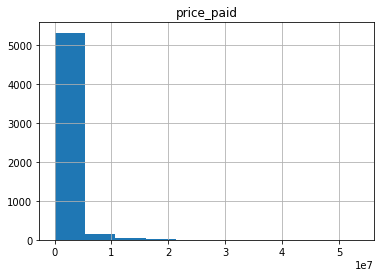

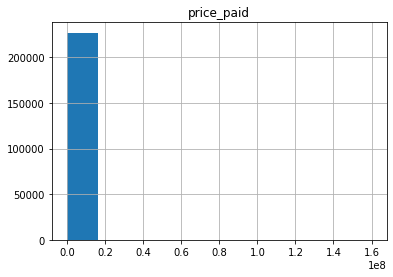

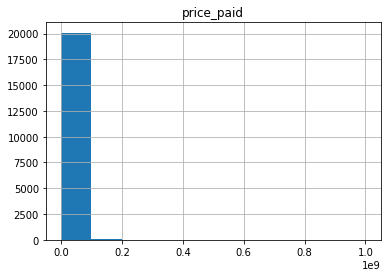

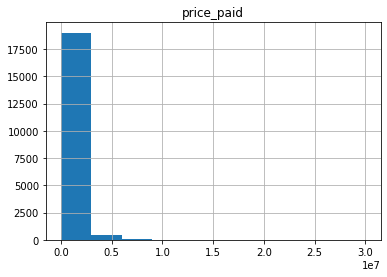

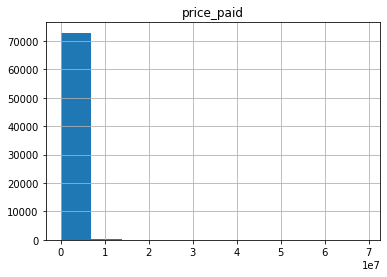

In [134]:
gb_property_type.hist()

In [128]:
df.groupby(['district']).mean()

,price_paid
district,
BARKING AND DAGENHAM,7.379167e+05
BARNET,6.785602e+05
BEXLEY,2.917508e+05
BRENT,6.407636e+05
BROMLEY,3.957689e+05
CAMDEN,1.577628e+06
CITY OF LONDON,5.291922e+06
CITY OF WESTMINSTER,2.702077e+06
CROYDON,3.669441e+05


# Scatter plot Price Paid vs Deed Date

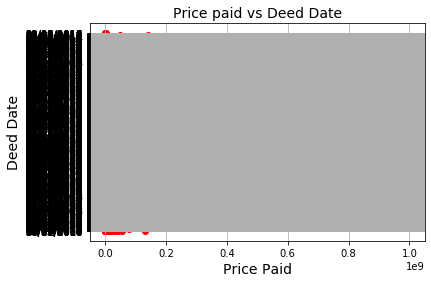

In [231]:
plotty.scatter(df['price_paid'], df['deed_date'], color='red')
plotty.title('Price paid vs Deed Date', fontsize=14)
plotty.xlabel('Deed Date', fontsize=14)
plotty.ylabel('Price Paid', fontsize=14)
plotty.grid(True)
plotty.show()
plotty.scatter()

# Transform latlon to make spatial sense
[source](https://datascience.stackexchange.com/questions/13567/ways-to-deal-with-longitude-latitude-feature)

In [249]:
def transform_latlon(lat, lon):
    x = cos(lat) * cos(lon)
    y = cos(lat) * sin(lon), 
    z = sin(lat)
    return (x, y, z)

# Investigation

Split into 4 districts, analyse and compare.

In [136]:
import_pricing()

In [139]:
districts = ['LEWISHAM', 'CITY OF WESTMINSTER','CROYDON','KENSINGTON AND CHELSEA']

In [151]:
lewisham = df[df['district'] == 'LEWISHAM']
croydon = df[df['district'] == 'CROYDON']
kensinton_and_chelsea = df[df['district'] == 'KENSINGTON AND CHELSEA']
city_of_westminster = df[df['district'] == 'CITY OF WESTMINSTER']